# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [60]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [61]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [62]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        loss = np.mean((X.dot(w) - y)**2)
        return loss
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        grad = 2 * np.dot(X.T, np.dot(X, w) - y) / y.shape[0]
        return grad

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [63]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [64]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    w_list = [w.copy()]
    
    for i in range(n_iterations):
        w -= lr * loss.calc_grad(X, y, w)
        w_list.append(np.array(w.copy()))
    
    return w_list

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [71]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init_start = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [72]:
def create_dataset():
    np.random.seed(1337)

    n_features = 2
    n_objects = 300
    batch_size = 10
    num_steps = 43

    w_true = np.random.normal(size=(n_features, ))

    X = np.random.uniform(-5, 5, (n_objects, n_features))
    X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
    y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
    w_init_start = np.random.uniform(-2, 2, (n_features))
    
    return X, y, w_init_start

In [73]:
loss = MSELoss()
w_list = gradient_descent(w_init_start, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [97]:

def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

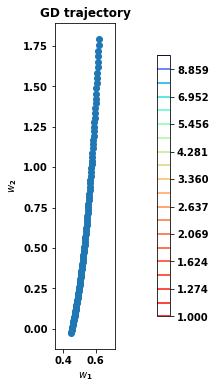

In [104]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(gradient_descent(create_dataset()[2], X, y, loss, 0.0001, 100))
plot_gd(wl, X, y, loss)

(Видимо, ближайшие цветные уровни перпендикулярны плоскости графика, поэтому не показаны)

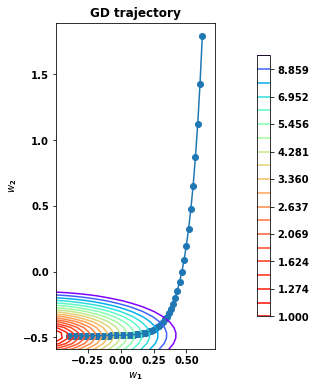

In [105]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(gradient_descent(create_dataset()[2], X, y, loss, 0.001, 100))
plot_gd(wl, X, y, loss)

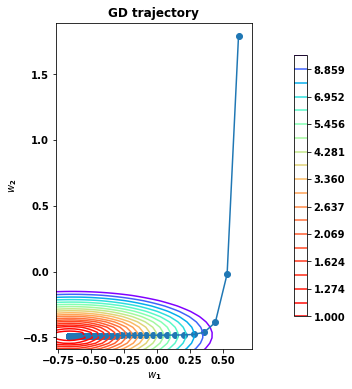

In [117]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(gradient_descent(create_dataset()[2], X, y, loss, 0.005, 100))
plot_gd(wl, X, y, loss)

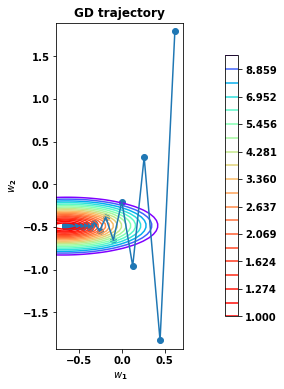

In [115]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(gradient_descent(create_dataset()[2], X, y, loss, 0.01, 100))
plot_gd(wl, X, y, loss)

Видно, что чем меньше длина шага тем более равномерно и ровно градиентный спуск идет к минимуму. Если увеличивать длину шага, разброс в ширину будет больше, шаги иногда будут отходить от верной траектории, но спуск будет происходить быстрее.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [118]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    w_list = [w.copy()]
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        w -= lr * loss.calc_grad(batch, y[batch_indices], w)
        w_list.append(np.array(w.copy()))

    return w_list



**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

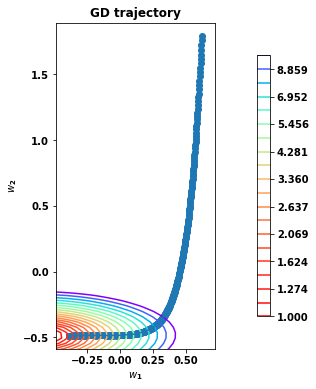

In [119]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.0001, 100))
plot_gd(wl, X, y, loss)

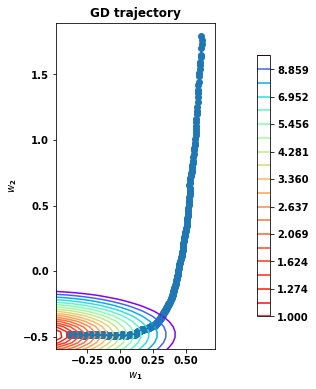

In [120]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.0001, 10))
plot_gd(wl, X, y, loss)

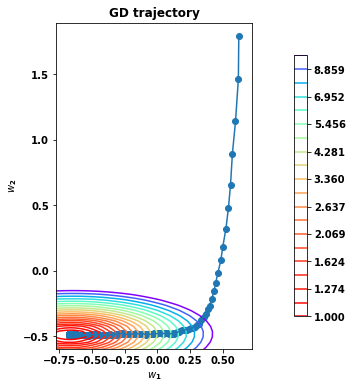

In [121]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.001, 100))
plot_gd(wl, X, y, loss)

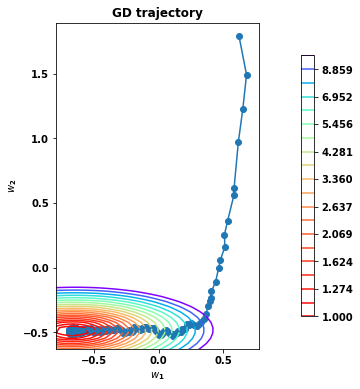

In [123]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.001, 10))
plot_gd(wl, X, y, loss)

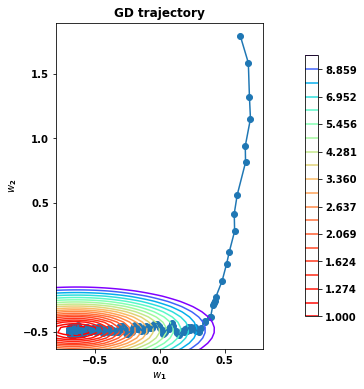

In [125]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.001, 5))
plot_gd(wl, X, y, loss)

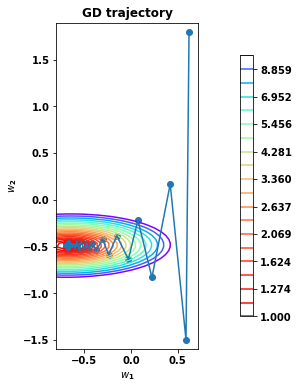

In [126]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.01, 100))
plot_gd(wl, X, y, loss)

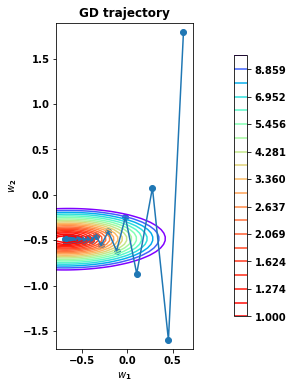

In [128]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.01, 200))
plot_gd(wl, X, y, loss)

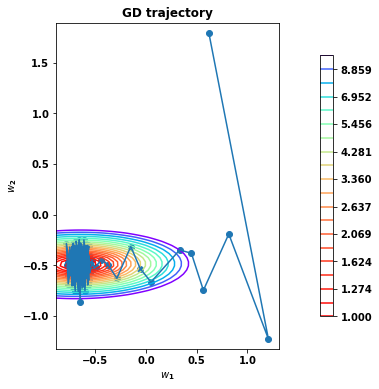

In [132]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.01, 10))
plot_gd(wl, X, y, loss)

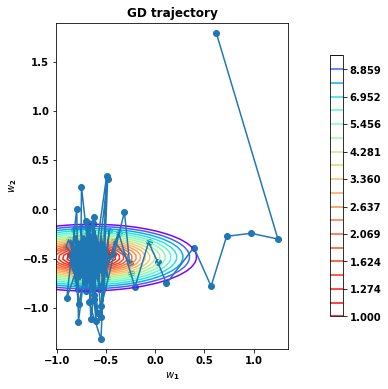

In [133]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.01, 5))
plot_gd(wl, X, y, loss) # тут вообще какой-то ужас происходит

Увеличение длины шага может приводить (как видно и в предыдущем задании) к более быстрому спусканию к минимуму, однако шаги часто неточные и направлены не по обобщенной траектории (условно - азимуту). При этом если у функции есть несколько минимумов, есть риск перескочить минимальный и попасть в один из локальных. Размер бэтча влияет на точность шагов: если он очень маленький, то минимальные неровности функции могут направлять гр спуск в абсолютно другую сторону, что также может привести к попадению не в глобальный, а в локальный минимум. Большое значение бэтча равноценно обычному градиентному спуску, что можно видеть и на графике.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [134]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    w_list = [w.copy()]
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        step_length = lr * ((1 / (1 + i))**p)
        w -= step_length * loss.calc_grad(batch, y[batch_indices], w)
        w_list.append(np.array(w.copy()))

    return w_list

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

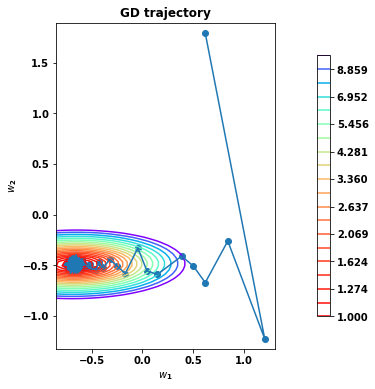

In [135]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.01, 10, 0.1))
plot_gd(wl, X, y, loss)

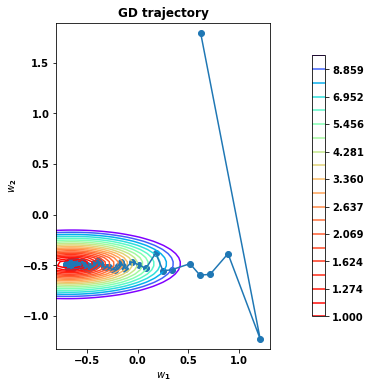

In [137]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.01, 10, 0.3))
plot_gd(wl, X, y, loss)

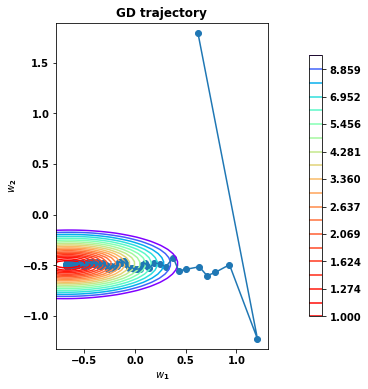

In [138]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.01, 10, 0.5))
plot_gd(wl, X, y, loss)

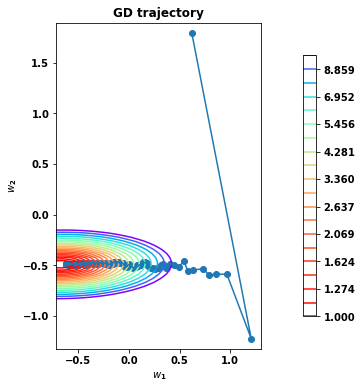

In [139]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.01, 10, 0.7))
plot_gd(wl, X, y, loss)

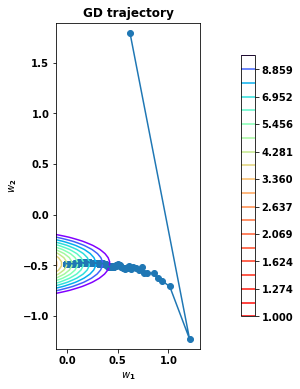

In [140]:
X = create_dataset()[0]
y = create_dataset()[1]
wl = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.01, 10, 1))
plot_gd(wl, X, y, loss)

Видно, что чем больше степень p, тем быстрее падает длина шага от большого к очень маленькому. Мне кажется, оптимальный шаг в нашем случае находится в диапазоне 0.1 - 0.3, поскольку вначале мы можем делать большие шаги, но чем ближе к минимуму, тем аккуратнее нужно идти, чтобы не перескочить его. При бОльших значениях p шаг слишком рано становится маленьким, а это времязатратно.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [151]:
import pandas as pd

X = create_dataset()[0]
y = create_dataset()[1]

w_sgd = np.array(stochastic_gradient_descent(create_dataset()[2], X, y, loss, 0.01, 10, 0.1))
w_gd = np.array(gradient_descent(create_dataset()[2], X, y, loss, 0.01, 1000))

loss_sgd = list()
loss_gd = list()

for i in range(1000):
    loss_sgd.append(loss.calc_loss(X, y, w_sgd[i]))
    loss_gd.append(loss.calc_loss(X, y, w_gd[i]))

df = pd.DataFrame()
df['loss_sgd'] = loss_sgd
df['loss_gd'] = loss_gd

In [153]:
df.head()

,loss_sgd,loss_gd
0,425.589177,425.589177
1,72.562909,155.262582
2,22.287841,58.675181
3,16.507984,23.678324
4,11.510238,10.654537


In [155]:
df.tail()

,loss_sgd,loss_gd
995,0.941110,0.867064
996,1.459799,0.867064
997,0.977446,0.867064
998,0.873349,0.867064
999,0.900312,0.867064


<function matplotlib.pyplot.show(*args, **kw)>

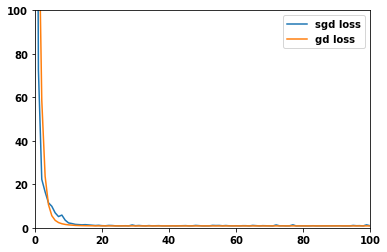

In [166]:
plt.plot(df['loss_sgd'], label='sgd loss')
plt.plot(df['loss_gd'], label='gd loss')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

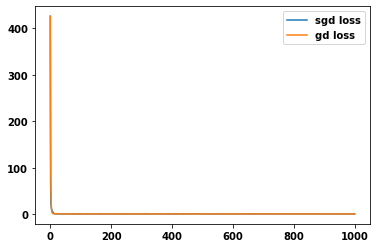

In [167]:
plt.plot(df['loss_sgd'], label='sgd loss')
plt.plot(df['loss_gd'], label='gd loss')
plt.legend()
plt.show

Если не приближать оси, то графики для стохастического и обычного градиентного спусков накладываются - лосс на каждой итерации примерно одинаковый (=его колебания не значительны по сравнению с общим диапазоном от ~400 до ~0). Лосс одинаково быстро падает для обоих спусков. Однако, если приблизить, можно наблюдать большие колебания лосса в сторону у стохастического гр спуска. Они объясняются тем, что при следующем шаге sgd выбирает куда пойти только по значениям в бэтче, которые могут незначительно, но все же отклоняться от среднего --> лосс будет немного больше, поскольку значения w подстроились больше под бэтч нежели чем под всю выборку.

Преимущество sgd здесь не видно, поскольку оно, наоборот, заключается в экономии памяти (помним только бэтч) и времени (быстрее считать только по бэтчу, нежели по всем иксам). Лосс же при этом будет иметь небольшие колебания, но в целом будет таким же.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [200]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_init = np.array([1.0]*X.shape[1])
        w = gradient_descent(w_init, X, y, self.loss, self.lr, 1000)
        self.w = w[-1]
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y = X.dot(self.w)
        return y

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [201]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [171]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [172]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

### Заполняем пропуски

In [177]:
X_raw.head()

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [179]:
X_raw.shape

(201, 26)

In [175]:
X_raw.isna().sum()

index     0
0         0
1        37
2         0
3         0
4         0
5         2
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        4
19        4
20        0
21        2
22        2
23        0
24        0
dtype: int64

In [180]:
cat_features_mask = (X_raw.dtypes == "object").values

In [181]:
from sklearn.impute import SimpleImputer

In [182]:
# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)
# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

In [183]:
X_no_mis.head()

,index,0,1,9,10,11,12,13,16,18,...,2,3,4,5,6,7,8,14,15,17
0,0.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,1.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,2.0,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,3.0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,4.0,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### Кодируем вещественные признаки

In [185]:
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
print(X_dum.shape)
X_dum.head()

(201, 66)


,index,0,1,9,10,11,12,13,16,18,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,0,0,0,0,0,0,0,1,0,0
1,1.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,0,0,0,0,0,0,0,1,0,0
2,2.0,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,...,0,0,0,0,0,0,0,1,0,0
3,3.0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,...,0,0,0,0,0,0,0,1,0,0
4,4.0,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,...,0,0,0,0,0,0,0,1,0,0


### Нормализуем

In [186]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [187]:
normalizer = MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data=X_real_norm_np)

In [188]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.000000,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.004902,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.009804,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.014706,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.019608,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Разделяем на тестовую и тренировочную выборку

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [202]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [203]:
from sklearn.metrics import mean_squared_error

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 2427387.0137138367
Test: 7165134.92834452


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [225]:
a = wl
a[-1] = np.array([[0, 0]])
a.shape

(1001, 2)

In [252]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        loss = np.mean((X.dot(w) - y)**2) + self.coef * (w[:-1]**2)
        return loss
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w[-1] = np.array([0.])
        grad = 2 * np.dot(X.T, np.dot(X, w) - y) / y.shape[0] + 2 * self.coef * w
        return grad

        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [227]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [258]:
linear_regression = LinearRegression(MSEL2Loss(0.8))
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 24906792.459205244
Test: 59343308.31827528


In [259]:
linear_regression = LinearRegression(MSEL2Loss(0.1))
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 9054434.14219278
Test: 23262102.287759636


In [261]:
#коэф 1
linear_regression = LinearRegression(MSEL2Loss(0.05))
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 6751628.798194041
Test: 17294914.05669441


In [266]:
linear_regression = LinearRegression(MSEL2Loss(0))
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 2471589.841327545
Test: 7274166.078781593


In [255]:
linear_regression = LinearRegression(MSELoss())
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 2427387.0137138367
Test: 7165134.92834452


Я подбирала коэффициент, уменьшая от 1 (если брать больше 1, то числа еще больше). Видно, что минимальная ошибка достигается при коэффициенте = 0...  При всех значениях ее ошибки все равно немного больше, чем без регуляризации.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [299]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        y_pred = X.dot(w)
        dif = np.abs(y_pred - y) < self.eps
        mse_part = (y_pred - y)**2 /2
        mae_part = self.eps*(np.abs(y_pred - y) - self.eps/2)
        loss = np.mean(np.where(dif, mse_part, mae_part))

        return loss
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        y_pred = X.dot(w)
        dif = np.abs(y_pred - y) < self.eps
        mse_part = y_pred - y
        mae_part = self.eps*(np.sign(y_pred - y))
        grad = np.mean(np.where(dif, mse_part, mae_part).dot(X))
        
        return grad
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [330]:
linear_regression = LinearRegression(HuberLoss(20))
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 51437410.68566316
Test: 102564731.7551868


In [333]:
linear_regression = LinearRegression(HuberLoss(5))
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 51366931.014947355
Test: 102420196.44135316


In [335]:
linear_regression = LinearRegression(HuberLoss(4))
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 51362247.11259901
Test: 102410575.91415296


In [324]:
linear_regression = LinearRegression(HuberLoss(1))
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 51990676.13433773
Test: 103685290.80237676


In [323]:
linear_regression = LinearRegression(HuberLoss(0.5))
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 52902699.56640654
Test: 105484056.30072841


In [321]:
linear_regression = LinearRegression(HuberLoss(0.05))
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 148620036.14466137
Test: 241060104.91382512


In [305]:
linear_regression = LinearRegression(MSELoss())
linear_regression.fit(X_train, y_train)

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 2427387.0137138367
Test: 7165134.92834452


Оптимальный параметр лежит в районе 4, поскольку если его брать меньше или больше, ошибка растет.
По сравнению с обычной mse, huber loss работает гораздо хуже - видимо, в выборке нет выбросое и mae работает хуже чем mse.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [220]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://sun9-34.userapi.com/impg/EQVLbY2r50Vqj6DdgN4FDsD9F9AG8pKObGcpoA/Rqy9sqDB2e0.jpg?size=948x622&quality=96&sign=ad236af7e16fff4b5145ec02b67408d7&type=album")

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [219]:
def annealing(w_init, X, y, loss, n_iterations):
    
    w = np.array(w_init)
    old_w = w
    
    for i in range(n_iterations):
        new_w = old_w + np.random.standard_t(3, size=old_w.shape)
        t -= 1